# Stock during lockdown

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

### Quick look of our data 

In [5]:
f = r'C:\Users\Josè Valencia\Desktop\Python\Metodos Estadisticos\NYSE.csv'
barcelona = pd.read_csv(f, index_col=0)
barcelona.head()

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,Industry,Exchange
1,A,"Agilent Technologies, Inc.",88.14,$27.15B,1999.0,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NYSE
2,AA,Alcoa Corporation,9.21,$1.71B,2016.0,Basic Industries,Aluminum,NYSE
3,AAN,"Aaron&#39;s, Inc.",36.91,$2.49B,NaN,Technology,Diversified Commercial Services,NYSE
4,AAP,Advance Auto Parts Inc,139.32,$9.63B,NaN,Consumer Services,Other Specialty Stores,NYSE
5,AAT,"American Assets Trust, Inc.",26.17,$1.57B,2011.0,Consumer Services,Real Estate Investment Trusts,NYSE


In [6]:
import seaborn as sns
sns.set_style('darkgrid')

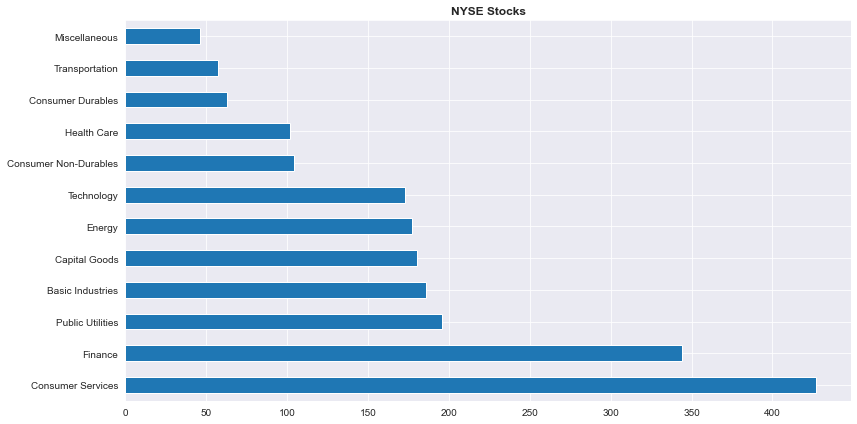

In [7]:
industry = barcelona.Sector.value_counts()
plt.title('NYSE Stocks', fontweight='bold')
industry.plot(kind='barh', figsize=(13,7))

plt.show()

## Let's focus on Healthcare

In [8]:
health = barcelona[barcelona.Sector == 'Health Care']
health.Industry.value_counts() 


Major Pharmaceuticals                                            32
Medical/Dental Instruments                                       19
Medical Specialities                                             12
Hospital/Nursing Management                                      10
Industrial Specialties                                            7
Medical/Nursing Services                                          6
Other Pharmaceuticals                                             5
Biotechnology: Electromedical & Electrotherapeutic Apparatus      3
Misc Health and Biotechnology Services                            3
Biotechnology: Commercial Physical & Biological Resarch           2
Ophthalmic Goods                                                  2
Biotechnology: Biological Products (No Diagnostic Substances)     1
Name: Industry, dtype: int64

In [9]:
Pharma = health[health.Industry == 'Major Pharmaceuticals']
companies = Pharma.sort_values(by =['LastSale'], ascending=True)[-5:]
companies

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,Industry,Exchange
8,ABBV,AbbVie Inc.,92.67,$163.32B,2012.0,Health Care,Major Pharmaceuticals,NYSE
17,ABT,Abbott Laboratories,94.92,$167.9B,NaN,Health Care,Major Pharmaceuticals,NYSE
3087,ZTS,Zoetis Inc.,139.39,$66.2B,2013.0,Health Care,Major Pharmaceuticals,NYSE
1549,JNJ,Johnson & Johnson,148.75,$392.16B,NaN,Health Care,Major Pharmaceuticals,NYSE
1681,LLY,Eli Lilly and Company,152.95,$146.29B,NaN,Health Care,Major Pharmaceuticals,NYSE


In [10]:

start, end = datetime(2020,1,2), datetime(2020,6,10)
stocks = companies.Symbol.to_list()
portfolio = pd.DataFrame()
for stock in stocks:
    load = yf.download(stock, start, end)
    portfolio[stock] = load['Adj Close']
    try:
        tick = yf.Ticker(stock)
        print('%s: %s' % (stock, tick.info['shortName']))
    except:
        print('No data for %s' % stock)

[*********************100%***********************]  1 of 1 completed
ABBV: AbbVie Inc.
[*********************100%***********************]  1 of 1 completed
ABT: Abbott Laboratories
[*********************100%***********************]  1 of 1 completed
ZTS: Zoetis Inc.
[*********************100%***********************]  1 of 1 completed
JNJ: Johnson & Johnson
[*********************100%***********************]  1 of 1 completed
LLY: Eli Lilly and Company


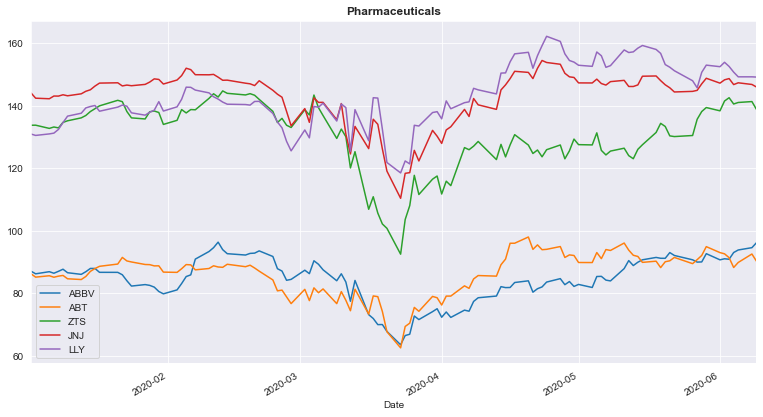

In [11]:
portfolio.plot(figsize=(13,7))
plt.title('Pharmaceuticals', fontweight = 'bold')
plt.show()

In [2]:
!pip install plotly

  Using cached plotly-4.8.1-py2.py3-none-any.whl (11.5 MB)


In [3]:
import plotly.graph_objects as go

In [18]:
go.Figure(go.line(portfolio.ZTS))

AttributeError: module 'plotly.graph_objects' has no attribute 'line'